# Week-25
Dataset Resource : [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)
![download.png](attachment:download.png)

## Modelling

In [9]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
# rcParams['figure.figsize'] = 4,4
# plt.style.use('fivethirtyeight')

from collections import Counter

# for modeling 
import sklearn
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [10]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [11]:
df=pd.read_csv('weather_cleandata_noOutlier.csv',index_col=[0])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,DiffTemp,RainTomorrow
0,13.4,22.9,0.6,9.24,8.92,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,3.8,16.9,21.8,0.0,12.0,9.5,0.0
1,7.4,25.1,0.0,7.68,10.36,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,2.2,3.0,17.2,24.3,0.0,12.0,17.7,0.0
2,12.9,25.7,0.0,10.48,11.02,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.8,2.0,21.0,23.2,0.0,12.0,12.8,0.0
3,9.2,28.0,0.0,10.00,12.22,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,2.4,4.0,18.1,26.5,0.0,12.0,18.8,0.0
4,17.5,32.3,1.0,5.64,8.26,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,12.0,14.8,0.0


In [12]:
# separating the dependent and independent data
X=df.drop(["RainTomorrow"], axis=1)
y=df["RainTomorrow"]

# the function train_test_split creates random data samples (default: 75-25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state =42)

# getting the shapes
print(f"""shape of X_train: {X_train.shape}
shape of X_test\t: {X_test.shape}
shape of y_train: {y_train.shape}
shape of y_test\t: {y_test.shape}""")

shape of X_train: (95031, 19)
shape of X_test	: (31677, 19)
shape of y_train: (95031,)
shape of y_test	: (31677,)


### Smooting

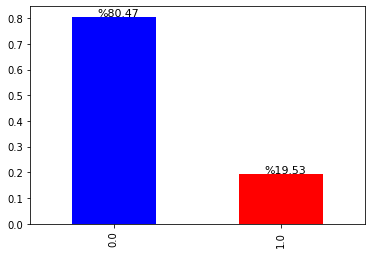

In [13]:
ax = df['RainTomorrow'].value_counts(normalize=True).plot.bar(color=["blue", "red"])
def labels(ax):
    for p in ax.patches:
        ax.annotate(f"%{p.get_height()*100:.2f}", (p.get_x() + 0.15, p.get_height() * 1.005),size=11)
labels(ax)

In [14]:
# # pip install imblearn
# from imblearn import under_sampling, over_sampling
# from imblearn.over_sampling import SMOTE

In [15]:
# oversmote = SMOTE()
# X_train, y_train= oversmote.fit_resample(X_train, y_train)

In [16]:
# ax = y_train.value_counts().plot.bar(color=["blue", "red"])
# def labels(ax):
#     for p in ax.patches:
#         ax.annotate(f"{p.get_height()}", (p.get_x() + 0.15, p.get_height()+200),size=8)
# labels(ax)
# plt.show()

In [17]:
# X_train.shape

### Data Scaling

In [18]:
# creating a minmax scaler
sc = MinMaxScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
cv_acc_train = {}
cv_acc_test = {}
cv_TPR = {}
cv_FPR = {}
cv_AUC = {}
f1 = {}
recall = {}

In [20]:
def plot_result(model, name:str):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation based on a 10-fold cross-validation
    scoring = ['balanced_accuracy', 'recall_macro']
    scores_train = cross_val_score(model, X_train, y_train, cv=10, scoring = 'balanced_accuracy')
    scores_test = cross_val_score(model, X_test, y_test, cv=10, scoring = 'balanced_accuracy')  
    cv_acc_train[name] = round(scores_train.mean(), 4)  # balanced accuracy
    cv_acc_test[name] = round(scores_test.mean(), 4)  # balanced accuracy
    cv_TPR[name] = (confusion_matrix(y_test, y_pred)[1][1]/confusion_matrix(y_test, y_pred)[1].sum())  # recall (Max)
    cv_FPR[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())  # fallout (Min)
    f1[name] = f1_score(y_test, y_pred, average='macro')
    recall[name] = recall_score(y_test, y_pred, average='macro')
    
    # accuracy scores
    print('Average Balanced Accuracy (CV=10), Test Set:', scores_test.mean())  
    print('Average Balanced Accuracy (CV=10), Training Set: ', scores_train.mean())

    # print classification report
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot Confusion Matrix
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

In [21]:
def plot_feature_importances(model):
    feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)[:10]

    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.title("Feature Importance")
    plt.show()

    print(f"Top 10 Feature Importance for {str(model).split('(')[0]}\n\n",feature_imp[:10],sep='')

### 1-Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
plot_result(lr, "lr")

### 2-Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
plot_result(nb, "nb")

### 3-K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# knn = KNeighborsClassifier()
# plot_result(knn, "knn")

### 4-Support Vector Mechanism (SVM)

In [ ]:
# svc = SVC(probability=True)  # default values
# plot_result(svc, "svc")

### 5-Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
dtc = DecisionTreeClassifier()
plot_result(dtc, "dtc")

### 6-NearestCentroid

In [ ]:
from sklearn.neighbors import NearestCentroid

In [ ]:
nc = NearestCentroid()
plot_result(nc, "nc")

### 7-Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

Average Balanced Accuracy (CV=10), Test Set: 0.6878179145475161
Average Balanced Accuracy (CV=10), Training Set:  0.6946412537728153
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     25492
         1.0       0.74      0.43      0.55      6185

    accuracy                           0.86     31677
   macro avg       0.81      0.70      0.73     31677
weighted avg       0.85      0.86      0.84     31677



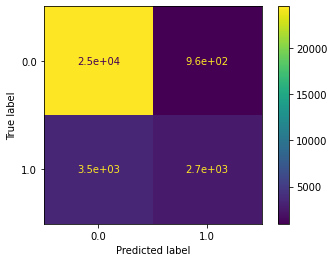

In [34]:
rfc = RandomForestClassifier()
plot_result(rfc, "rfc")

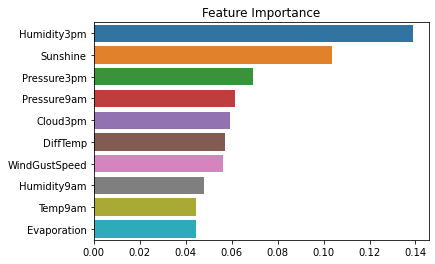

Top 10 Feature Importance for RandomForestClassifier

Humidity3pm      0.138793
Sunshine         0.103771
Pressure3pm      0.069201
Pressure9am      0.061252
Cloud3pm         0.059163
DiffTemp         0.057026
WindGustSpeed    0.056126
Humidity9am      0.047936
Temp9am          0.044674
Evaporation      0.044571
dtype: float64


In [35]:
plot_feature_importances(rfc)

### 8-Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
# gbc = GradientBoostingClassifier(random_state=42)
# plot_result(gbc, "gbc")

In [38]:
# plot_feature_importances(gbc)

### 9-XGBOOST

In [39]:
from xgboost import XGBClassifier

Average Balanced Accuracy (CV=10), Test Set: 0.6930726143501194
Average Balanced Accuracy (CV=10), Training Set:  0.6883483240551043
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     25492
         1.0       0.73      0.42      0.53      6185

    accuracy                           0.86     31677
   macro avg       0.80      0.69      0.72     31677
weighted avg       0.84      0.86      0.84     31677



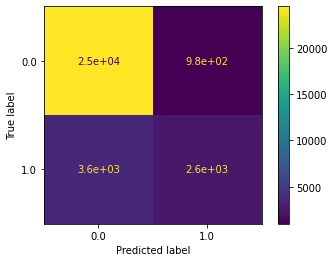

In [40]:
xgb = XGBClassifier(eval_metric = "logloss")
plot_result(xgb, "xgb")

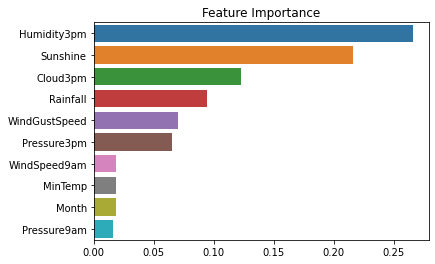

Top 10 Feature Importance for XGBClassifier

Humidity3pm      0.265943
Sunshine         0.215865
Cloud3pm         0.122724
Rainfall         0.094586
WindGustSpeed    0.070350
Pressure3pm      0.065274
WindSpeed9am     0.018812
MinTemp          0.018591
Month            0.018342
Pressure9am      0.016351
dtype: float32


In [41]:
plot_feature_importances(xgb)

### 10-LightGBM

In [42]:
from lightgbm import LGBMClassifier

Average Balanced Accuracy (CV=10), Test Set: 0.7050566974878006
Average Balanced Accuracy (CV=10), Training Set:  0.7042880705872216
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     25492
         1.0       0.72      0.46      0.56      6185

    accuracy                           0.86     31677
   macro avg       0.80      0.71      0.74     31677
weighted avg       0.85      0.86      0.85     31677



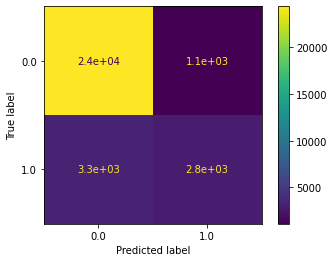

In [43]:
lgb = LGBMClassifier()
plot_result(lgb, "lgb")

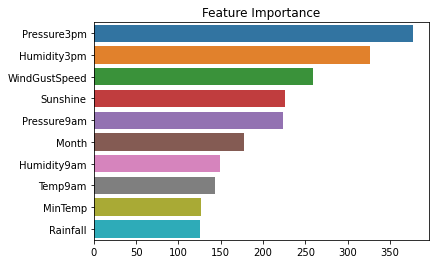

Top 10 Feature Importance for LGBMClassifier

Pressure3pm      377
Humidity3pm      326
WindGustSpeed    259
Sunshine         226
Pressure9am      224
Month            178
Humidity9am      149
Temp9am          143
MinTemp          127
Rainfall         126
dtype: int64


In [44]:
plot_feature_importances(lgb)

### 11-Catboost

In [47]:
!pip install catboost

     |████████████████████████████████| 69.2 MB 5.6 kB/s 


In [48]:
from catboost import CatBoostClassifier, Pool

Streaming output truncated to the last 5000 lines.
15:	learn: 0.4246716	total: 252ms	remaining: 15.5s
16:	learn: 0.4185991	total: 268ms	remaining: 15.5s
17:	learn: 0.4131710	total: 286ms	remaining: 15.6s
18:	learn: 0.4079256	total: 302ms	remaining: 15.6s
19:	learn: 0.4025651	total: 317ms	remaining: 15.5s
20:	learn: 0.3982238	total: 333ms	remaining: 15.5s
21:	learn: 0.3941603	total: 347ms	remaining: 15.4s
22:	learn: 0.3908391	total: 362ms	remaining: 15.4s
23:	learn: 0.3875361	total: 379ms	remaining: 15.4s
24:	learn: 0.3849494	total: 396ms	remaining: 15.4s
25:	learn: 0.3817466	total: 417ms	remaining: 15.6s
26:	learn: 0.3794330	total: 434ms	remaining: 15.7s
27:	learn: 0.3769799	total: 448ms	remaining: 15.6s
28:	learn: 0.3748427	total: 463ms	remaining: 15.5s
29:	learn: 0.3730339	total: 479ms	remaining: 15.5s
30:	learn: 0.3714249	total: 495ms	remaining: 15.5s
31:	learn: 0.3694546	total: 511ms	remaining: 15.5s
32:	learn: 0.3677660	total: 525ms	remaining: 15.4s
33:	learn: 0.3665471	total: 540

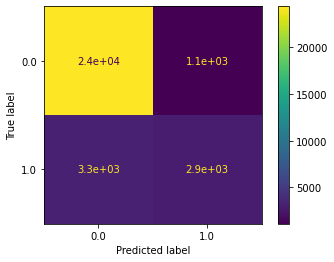

In [49]:
cat = CatBoostClassifier()
plot_result(cat, "cat")

In [50]:

def AUC(cv_AUC, X_test=X_test):
    dtc_auc= roc_auc_score(y_test,dtc.predict(X_test)) #Decision Tree Classifier
    lr_auc= roc_auc_score(y_test, lr.decision_function(X_test))#logistic regression
#     svc_auc= roc_auc_score(y_test, svc.decision_function(X_test))#Support Vector Classifier
    nc_auc= roc_auc_score(y_test, nc.predict(X_test))#Nearest Centroid Classifier
    rfc_auc= roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])#Randomforest Classifier
#     gbc_auc= roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])#GradientBoosting Classifier
    nb_auc= roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])#Naive Bayes Classifier
#     knn_auc= roc_auc_score(y_test, knn.predict(X_test))#KNeighbors Classifier
    xgb_auc= roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])#XGBoost Classifier
    lgb_auc= roc_auc_score(y_test, lgb.predict_proba(X_test)[:,1])#LightGBM Classifier
    cat_auc= roc_auc_score(y_test, cat.predict_proba(X_test)[:,1])#Catboost Classifier

    cv_AUC={'dtc': dtc_auc,
           'lr': lr_auc,
#            'svc':svc_auc,
           'nc':nc_auc,
           'rfc':rfc_auc,
#            'gbc':gbc_auc,
           'nb':nb_auc,
#            'knn':knn_auc,
           'xgb':xgb_auc,
           'lgb':lgb_auc,
           'cat':cat_auc}
    
    return cv_AUC

In [51]:
cv_AUC = AUC(cv_AUC)
df_eval = pd.DataFrame(data={'model': list(cv_acc_test.keys()), 
                             'bal_acc_train':list(cv_acc_train.values()),
                             'bal_acc_test': list(cv_acc_test.values()), 
                             'recall_1': list(cv_TPR.values()), 
                             'recall_macro': list(recall.values()), 
                             'f1_macro': list(f1.values()), 
                             'fallout':list(cv_FPR.values()),
                             'AUC': list(cv_AUC.values())}).round(2)
df_eval

,model,bal_acc_train,bal_acc_test,recall_1,recall_macro,f1_macro,fallout,AUC
0,lr,0.69,0.70,0.44,0.70,0.73,0.04,0.67
1,nb,0.74,0.74,0.68,0.74,0.70,0.20,0.86
2,dtc,0.67,0.67,0.48,0.67,0.67,0.14,0.73
3,nc,0.73,0.73,0.74,0.73,0.66,0.27,0.87
4,rfc,0.69,0.69,0.43,0.70,0.73,0.04,0.82
5,xgb,0.69,0.69,0.42,0.69,0.72,0.04,0.86
6,lgb,0.70,0.71,0.46,0.71,0.74,0.04,0.87
7,cat,0.71,0.70,0.47,0.71,0.75,0.04,0.88


![metrics.png](attachment:metrics.png)

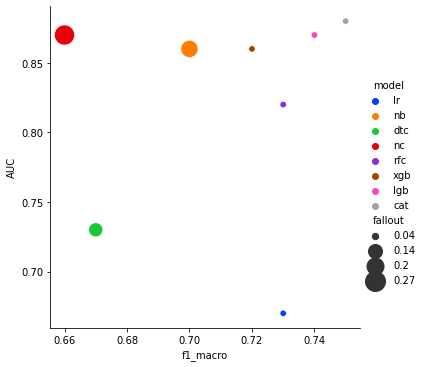

In [52]:
sns.relplot(x="f1_macro", y="AUC", hue="model", size="fallout", 
            sizes=(40, 400), alpha=1, palette="bright", height=5, legend='full', data=df_eval);

>>**Best Model is CatBoost**

### Tunning with XGBOOST

In [53]:
cv_acc_train = {}
cv_acc_test = {}
cv_TPR = {}
cv_FPR = {}
cv_AUC = {}
f1 = {}
recall = {}

In [54]:
from xgboost import XGBClassifier

params = {"n_estimators": [200, 300],
          "subsample":[0.5,1],
          "max_depth":[15,25],
          "learning_rate":[0.01,0.1,0.3]}


In [55]:
# xgb = GridSearchCV(xgb, params, cv = 5, 
#                    n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [56]:
# xgb.best_params_

In [57]:
xgb= XGBClassifier(learning_rate= 0.3, 
                    max_depth= 15, 
                    n_estimators= 200, 
                    subsample= 1).fit(X_train, y_train)

# confusion_matrix(y_test, xgb.predict(X_test))

In [ ]:
plot_result(xgb, "xgb")

### Tunning with LightGBM

In [ ]:
from lightgbm import LGBMClassifier

params = {"n_estimators": [200, 300],
          "subsample":[0.5,1],
          "max_depth":[15,25],
          "learning_rate":[0.01,0.1,0.3]}

In [ ]:
# lgb = GridSearchCV(LGBMClassifier(), params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
# lgb.best_params_

In [ ]:
lgb= LGBMClassifier(learning_rate= 0.1, 
                    max_depth= 18, 
                    n_estimators= 275, 
                    subsample= 0.5).fit(X_train, y_train)

# confusion_matrix(y_test, lgb.predict(X_test))

In [ ]:
plot_result(lgb, "lgb")

### Tunning with CatBoost

In [65]:
from catboost import CatBoostClassifier, Pool

# params = {"n_estimators": [200, 300],
#           "subsample":[0.5,1],
#           "max_depth":[1,16],
#           "learning_rate":[0.01,0.1,0.3]}

In [66]:
# cat = GridSearchCV(CatBoostClassifier(), params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [67]:
# cat.best_params_

In [68]:
cat= CatBoostClassifier(
                    # learning_rate= 0.1, 
                    # max_depth= 2, 
                    # n_estimators= 275, 
                    # subsample= 0.5,
                    ).fit(X_train, y_train)

confusion_matrix(y_test, cat.predict(X_test))

Learning rate set to 0.072025
0:	learn: 0.6403546	total: 37.8ms	remaining: 37.7s
1:	learn: 0.5926249	total: 71.9ms	remaining: 35.9s
2:	learn: 0.5550257	total: 110ms	remaining: 36.7s
3:	learn: 0.5235524	total: 143ms	remaining: 35.6s
4:	learn: 0.4964428	total: 179ms	remaining: 35.6s
5:	learn: 0.4758161	total: 224ms	remaining: 37.2s
6:	learn: 0.4576487	total: 260ms	remaining: 36.8s
7:	learn: 0.4426272	total: 297ms	remaining: 36.8s
8:	learn: 0.4291711	total: 337ms	remaining: 37.1s
9:	learn: 0.4178534	total: 372ms	remaining: 36.8s
10:	learn: 0.4090094	total: 412ms	remaining: 37.1s
11:	learn: 0.4017540	total: 451ms	remaining: 37.2s
12:	learn: 0.3949944	total: 486ms	remaining: 36.9s
13:	learn: 0.3885694	total: 528ms	remaining: 37.2s
14:	learn: 0.3839209	total: 564ms	remaining: 37s
15:	learn: 0.3794402	total: 601ms	remaining: 37s
16:	learn: 0.3754812	total: 642ms	remaining: 37.1s
17:	learn: 0.3726191	total: 687ms	remaining: 37.5s
18:	learn: 0.3694877	total: 727ms	remaining: 37.6s
19:	learn: 0.

array([[24385,  1107],
       [ 3257,  2928]])

Streaming output truncated to the last 5000 lines.
15:	learn: 0.4246716	total: 264ms	remaining: 16.2s
16:	learn: 0.4185991	total: 280ms	remaining: 16.2s
17:	learn: 0.4131710	total: 297ms	remaining: 16.2s
18:	learn: 0.4079256	total: 311ms	remaining: 16.1s
19:	learn: 0.4025651	total: 326ms	remaining: 16s
20:	learn: 0.3982238	total: 341ms	remaining: 15.9s
21:	learn: 0.3941603	total: 356ms	remaining: 15.8s
22:	learn: 0.3908391	total: 372ms	remaining: 15.8s
23:	learn: 0.3875361	total: 389ms	remaining: 15.8s
24:	learn: 0.3849494	total: 405ms	remaining: 15.8s
25:	learn: 0.3817466	total: 425ms	remaining: 15.9s
26:	learn: 0.3794330	total: 442ms	remaining: 15.9s
27:	learn: 0.3769799	total: 456ms	remaining: 15.8s
28:	learn: 0.3748427	total: 472ms	remaining: 15.8s
29:	learn: 0.3730339	total: 488ms	remaining: 15.8s
30:	learn: 0.3714249	total: 504ms	remaining: 15.8s
31:	learn: 0.3694546	total: 518ms	remaining: 15.7s
32:	learn: 0.3677660	total: 533ms	remaining: 15.6s
33:	learn: 0.3665471	total: 546ms

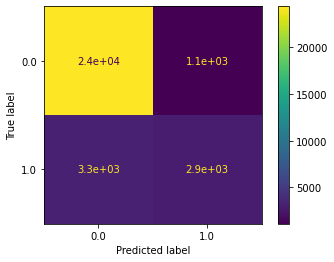

In [69]:
plot_result(cat, "cat")

In [70]:
def AUC(cv_AUC, X_test=X_test):
    xgb_auc= roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])#XGBoost Classifier
    lgb_auc= roc_auc_score(y_test, lgb.predict_proba(X_test)[:,1])#LightGBM Classifier  
    cat_auc= roc_auc_score(y_test, cat.predict_proba(X_test)[:,1])#Catboost Classifier
    
    cv_AUC={'xgb':xgb_auc,
            'lgb':lgb_auc,
            'cat':cat_auc,
           }
    
    return cv_AUC

cv_AUC = AUC(cv_AUC)
df_eval = pd.DataFrame(data={'model': list(cv_acc_test.keys()), 
                             'bal_acc_train':list(cv_acc_train.values()),
                             'bal_acc_test': list(cv_acc_test.values()), 
                             'recall_1': list(cv_TPR.values()), 
                             'recall_macro': list(recall.values()), 
                             'f1_macro': list(f1.values()), 
                             'fallout':list(cv_FPR.values()),
                             'AUC': list(cv_AUC.values())}).round(2)
df_eval

,model,bal_acc_train,bal_acc_test,recall_1,recall_macro,f1_macro,fallout,AUC
0,xgb,0.71,0.70,0.48,0.72,0.74,0.05,0.87
1,lgb,0.71,0.71,0.47,0.71,0.74,0.04,0.87
2,cat,0.71,0.70,0.47,0.71,0.75,0.04,0.88


>>**Best Model is CatBOOST**

### Saving Model

In [71]:
xgb= XGBClassifier(learning_rate= 0.3, 
                    max_depth= 15, 
                    n_estimators= 200, 
                    subsample= 1).fit(X, y)

In [72]:
y_pred = xgb.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    101967
         1.0       1.00      1.00      1.00     24741

    accuracy                           1.00    126708
   macro avg       1.00      1.00      1.00    126708
weighted avg       1.00      1.00      1.00    126708



In [73]:
import pickle
pickle.dump(xgb,open("model.pkl","wb"))
xgb_model = pickle.load(open("model.pkl","rb"))

In [74]:
my_dict = {'MinTemp': 21.9,
             'MaxTemp': 38.4,
             'Rainfall': 0.0,
             'Evaporation': 11.4,
             'Sunshine': 12.2,
             'WindGustSpeed': 31.0,
             'WindSpeed9am': 6.0,
             'WindSpeed3pm': 6.0,
             'Humidity9am': 37.0,
             'Humidity3pm': 22.0,
             'Pressure9am': 1012.7,
             'Pressure3pm': 1009.1,
             'Cloud9am': 1.0,
             'Cloud3pm': 5.0,
             'Temp9am': 29.1,
             'Temp3pm': 35.6,
             'RainToday': 0,
             'Month': 1,
             'DiffTemp': 16.5,
             'Location':'Cobar',
             'WindGustDir':'WNW',
             'WindDir9am':'WNW',
             'WindDir3pm':'WSW',
#              'RainTomorrow':0,
             }

In [75]:
X = pd.DataFrame([my_dict])
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,DiffTemp,Location,WindGustDir,WindDir9am,WindDir3pm
0,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,1,16.5,Cobar,WNW,WNW,WSW


In [76]:
all_columns=df.drop('RainTomorrow',axis=1).columns
all_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Month', 'DiffTemp'],
      dtype='object')

In [77]:
X = pd.get_dummies(X).reindex(columns=all_columns, fill_value=0)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,DiffTemp
0,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,1,16.5


### Make a Prediction

In [78]:
prediction_XGB = xgb_model.predict(X)
print("RainTomorrow : ",'Yes' if prediction_XGB[0] else 'No')

RainTomorrow :  No


In [79]:
prediction_XGB = xgb_model.predict_proba(X)
print(f'The Probability of the Rain is %{round(prediction_XGB[0][1]*100,1)}')

The Probability of the Rain is %0.3


In [80]:
my_dict = {'MinTemp': 10.5,
             'MaxTemp': 20.0,
             'Rainfall': 2.8,
             'Evaporation': 4.6,
             'Sunshine': 7.3,
             'WindGustSpeed': 67.0,
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 28.0,
             'Humidity9am': 83.0,
             'Humidity3pm': 10.0,
             'Pressure9am': 1011.7,
             'Pressure3pm': 1007.0,
             'Cloud9am': 5.0,
             'Cloud3pm': 6.0,
             'Temp9am': 15.4,
             'Temp3pm': 19.1,
             'RainToday': 1,
             'Month': 8,
             'DiffTemp': 9.5,
             'Location':'Perth',
             'WindGustDir':'NNW',
             'WindDir9am':'N',
             'WindDir3pm':'NW',
#              'RainTomorrow':1,
             }

X = pd.DataFrame([my_dict])
X = pd.get_dummies(X).reindex(columns=all_columns, fill_value=0)
prediction_XGB = xgb_model.predict(X)
print("RainTomorrow : ",'Yes' if prediction_XGB[0] else 'No')

RainTomorrow :  Yes


In [81]:
prediction_XGB = xgb_model.predict_proba(X)
print(f'The Probability of the Rain is %{round(prediction_XGB[0][1]*100,1)}')

The Probability of the Rain is %61.9
